In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


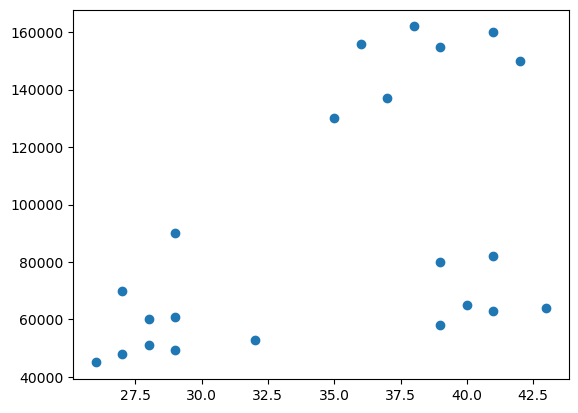

In [4]:
plt.scatter(df.Age, df['Income($)'])


In [5]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [6]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\prana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [7]:
df['cluster'] = y_predicted

In [8]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


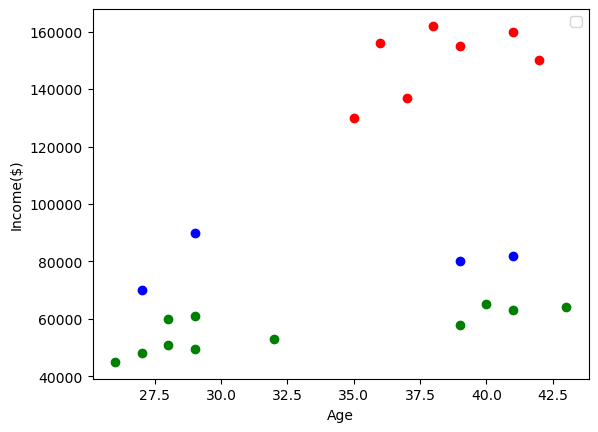

In [15]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color = 'g')
plt.scatter(df2.Age, df2['Income($)'], color = 'r')
plt.scatter(df3.Age, df3['Income($)'], color = 'b')

plt.xlabel('Age')
plt.ylabel("Income($)")
plt.legend()

In [16]:
scaler = MinMaxScaler()

In [29]:
age_data = df['Age'].values.reshape(-1, 1)
income_data = df['Income($)'].values.reshape(-1, 1)

# Fit and transform the scaled data for 'Age'
scaled_age = scaler.fit_transform(age_data)
# Assign the scaled values back to the DataFrame
df['Age'] = scaled_age

# Fit and transform the scaled data for 'Income($)'
scaled_income = scaler.fit_transform(income_data)
# Assign the scaled values back to the DataFrame
df['Income($)'] = scaled_income

In [31]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [32]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\prana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [35]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [37]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

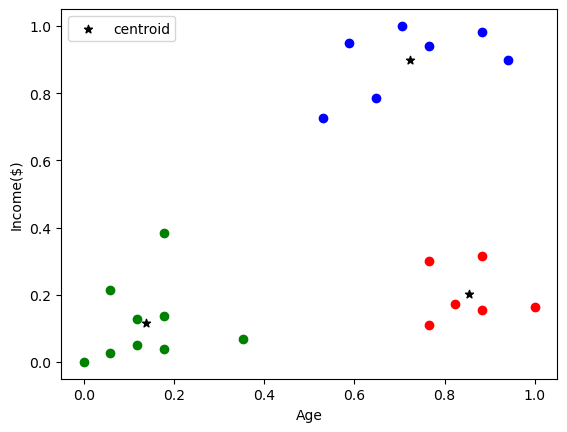

In [42]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color = 'g')
plt.scatter(df2.Age, df2['Income($)'], color = 'r')
plt.scatter(df3.Age, df3['Income($)'], color = 'b')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], marker= '*', color ='black', label = 'centroid')

plt.xlabel('Age')
plt.ylabel("Income($)")
plt.legend()